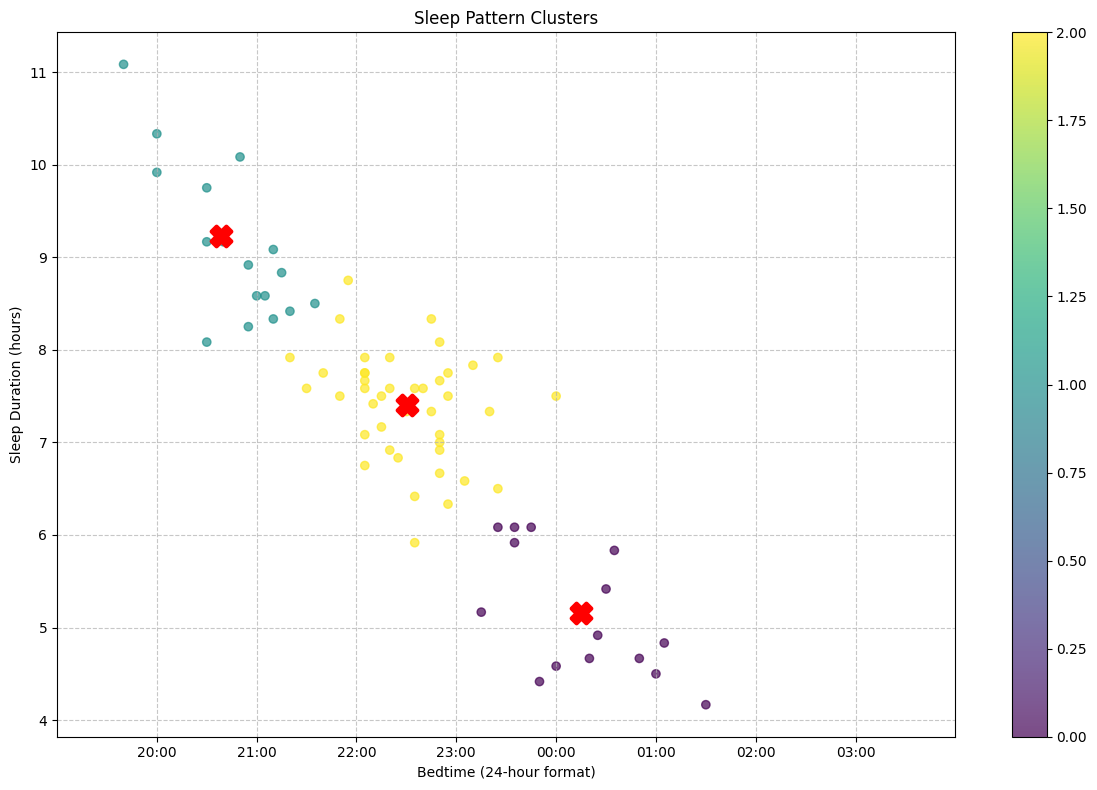

Cluster 1 center: Bedtime = 00:14, Sleep Duration = 5.16 hours
Cluster 2 center: Bedtime = 20:38, Sleep Duration = 9.23 hours
Cluster 3 center: Bedtime = 22:30, Sleep Duration = 7.40 hours

Data dan cluster masing-masing:
Data 1: Bedtime = 22:15, Sleep Duration = 7.17 hours -> Cluster 3
Data 2: Bedtime = 22:04, Sleep Duration = 7.75 hours -> Cluster 3
Data 3: Bedtime = 22:15, Sleep Duration = 7.50 hours -> Cluster 3
Data 4: Bedtime = 20:00, Sleep Duration = 10.33 hours -> Cluster 2
Data 5: Bedtime = 23:45, Sleep Duration = 6.08 hours -> Cluster 1
Data 6: Bedtime = 22:04, Sleep Duration = 7.92 hours -> Cluster 3
Data 7: Bedtime = 00:25, Sleep Duration = 4.92 hours -> Cluster 1
Data 8: Bedtime = 21:10, Sleep Duration = 9.08 hours -> Cluster 2
Data 9: Bedtime = 21:19, Sleep Duration = 7.92 hours -> Cluster 3
Data 10: Bedtime = 21:10, Sleep Duration = 8.33 hours -> Cluster 2
Data 11: Bedtime = 22:49, Sleep Duration = 7.00 hours -> Cluster 3
Data 12: Bedtime = 22:30, Sleep Duration = 7.33 h

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#konversi string ke format waktu desimal
def time_to_decimal(time_str):
    hours, minutes, seconds = map(int, time_str.split(':'))
    return hours + minutes / 60 + seconds / 3600

#membaca data dari link
url = 'https://raw.githubusercontent.com/zief0002/epsy-5261/main/data/teen-sleep.csv'
data = pd.read_csv(url)

#mengkonversi kolom bedtime menjadi waktu desimal jam dengan fungsi tadi
data['bedtime_decimal'] = data['bedtime'].apply(time_to_decimal)
data['bedtime_decimal'] = data['bedtime_decimal'].apply(lambda x: x if x >= 12 else x + 24)

#variabel untuk data dalam bentuk array
bedtime = data['bedtime_decimal'].values
sleep_duration = data['hrs_sleep'].values

X = np.column_stack((bedtime, sleep_duration)) #menggabungkan 2 kolom data

#standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#menerapkan kmeans 3 cluster
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

#menetapkan centroid/pusat cluste secara random
centers = scaler.inverse_transform(kmeans.cluster_centers_)
labels = kmeans.labels_

#visualisasi
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, linewidths=3)
plt.colorbar(scatter)
plt.xlabel('Bedtime (24-hour format)')
plt.ylabel('Sleep Duration (hours)')
plt.title('Sleep Pattern Clusters')

plt.xlim(19, 28)  # Adjust x-axis range
xticks = np.arange(20, 28, 1)
plt.xticks(xticks, [f"{int(h%24):02d}:00" for h in xticks])

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#hasil
for i, center in enumerate(centers):
    bedtime_str = f"{int(center[0]%24):02d}:{int((center[0]%1)*60):02d}"
    print(f"Cluster {i + 1} center: Bedtime = {bedtime_str}, Sleep Duration = {center[1]:.2f} hours")

print("\nData dan cluster masing-masing:")
for i, (bt, sd, label) in enumerate(zip(bedtime, sleep_duration, labels)):
    bedtime_str = f"{int(bt%24):02d}:{int((bt%1)*60):02d}"
    print(f"Data {i + 1}: Bedtime = {bedtime_str}, Sleep Duration = {sd:.2f} hours -> Cluster {label + 1}")

print(f"Jumlah iterasi yang dilakukan oleh KMeans: {kmeans.n_iter_}")